# Currency Exchange Rate Prediction using Python
To predict the currency exchange rate with machine learning, we first need to get the most appropriate data for this task. To get a dataset for this task just follow the steps mentioned below:
<ol>
    <li> Go to <a href="https://search.yahoo.com/">Yahoo Finance</a></li>
    <li>Search for “USD/KHR(KHR=x)”</li>
    <li>Click on “Historical Data”</li>
    <li>Click on “Download”</li>
</ol>

By following the steps mentioned above, you will be able to download the historical data of currency exchange rates of Indian Rupees. After clicking on download you will receive a CSV file in your downloads folder.

Now let’s import the necessary Python libraries that we need for this task and read the dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # setting seaborn default for plots
plt.style.use('ggplot')

data = pd.read_csv("https://raw.githubusercontent.com/PLSeng/MyPage/main/web/assets/KHR%3DX.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-09,3992.131348,4060.0,3992.053223,4055.0,4055.0,0
1,2019-12-10,3995.426758,4055.0,3995.426758,4055.0,4055.0,0
2,2019-12-11,3992.499023,4055.0,3989.313232,4053.0,4053.0,0
3,2019-12-12,3968.466309,4055.0,3968.466309,4055.0,4055.0,0
4,2019-12-13,3962.562256,4050.0,3962.562256,4051.0,4051.0,0


In this dataset, the values in the “Close” column are the target values that we need to predict. So let’s take a closer look at these values:

In [2]:
data.shape

(1044, 7)

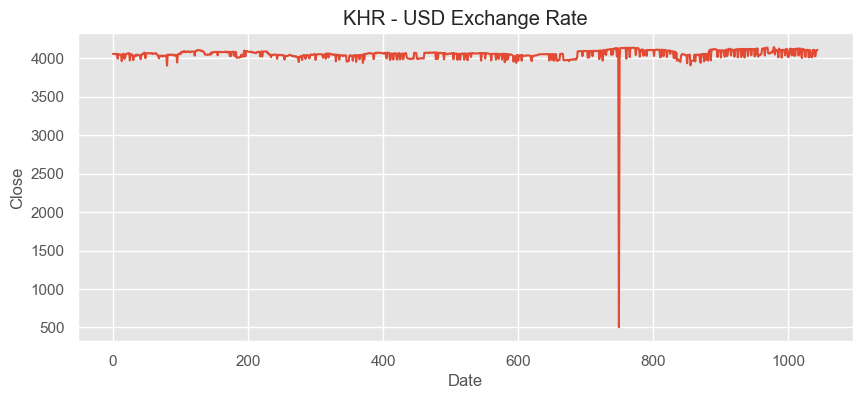

In [3]:
plt.figure(figsize=(10, 4))
plt.title("KHR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

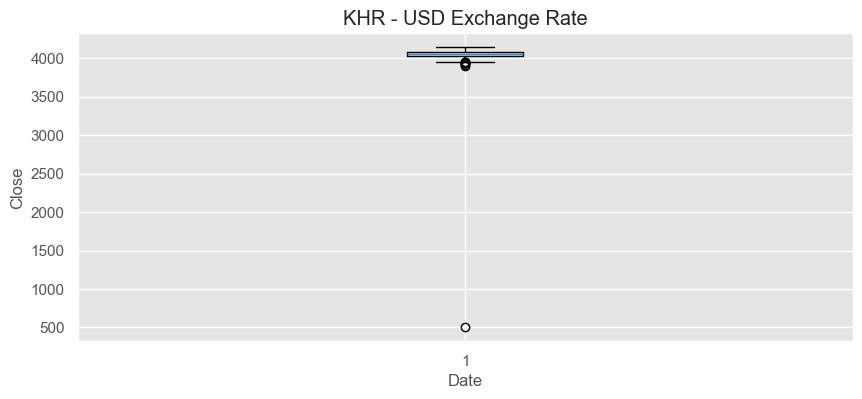

In [4]:
# plot boxplot
plt.figure(figsize=(10, 4))
plt.title("KHR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.boxplot(data["Close"])
plt.show()

## Data Preprocessing

In [5]:
# preprocessing

# drop Volume column
data = data.drop(['Volume'], axis=1)
data.head()

,Date,Open,High,Low,Close,Adj Close
0,2019-12-09,3992.131348,4060.0,3992.053223,4055.0,4055.0
1,2019-12-10,3995.426758,4055.0,3995.426758,4055.0,4055.0
2,2019-12-11,3992.499023,4055.0,3989.313232,4053.0,4053.0
3,2019-12-12,3968.466309,4055.0,3968.466309,4055.0,4055.0
4,2019-12-13,3962.562256,4050.0,3962.562256,4051.0,4051.0


In [6]:
# find outlier of each column except date and remove the outlier
Q1 = data['Open'].quantile(0.25)
Q3 = data['Open'].quantile(0.75)
IQR = Q3 - Q1
# set outlier to null
data['Open'] = np.where(data['Open'] > (Q3 + 1.5 * IQR), None, data['Open'])
data['Open'] = np.where(data['Open'] < (Q1 - 1.5 * IQR), None, data['Open'])

Q1 = data['High'].quantile(0.25)
Q3 = data['High'].quantile(0.75)
IQR = Q3 - Q1
# set outlier to null
data['High'] = np.where(data['High'] > (Q3 + 1.5 * IQR), None, data['High'])
data['High'] = np.where(data['High'] < (Q1 - 1.5 * IQR), None, data['High'])

Q1 = data['Low'].quantile(0.25)
Q3 = data['Low'].quantile(0.75)
IQR = Q3 - Q1
# set outlier to null
data['Low'] = np.where(data['Low'] > (Q3 + 1.5 * IQR), None, data['Low'])
data['Low'] = np.where(data['Low'] < (Q1 - 1.5 * IQR), None, data['Low'])

Q1 = data['Close'].quantile(0.25)
Q3 = data['Close'].quantile(0.75)
IQR = Q3 - Q1
# set outlier to null
data['Close'] = np.where(data['Close'] > (Q3 + 1.5 * IQR), None, data['Close'])
data['Close'] = np.where(data['Close'] < (Q1 - 1.5 * IQR), None, data['Close'])

Q1 = data['Adj Close'].quantile(0.25)
Q3 = data['Adj Close'].quantile(0.75)
IQR = Q3 - Q1
# set outlier to null
data['Adj Close'] = np.where(data['Adj Close'] > (Q3 + 1.5 * IQR), None, data['Adj Close'])
data['Adj Close'] = np.where(data['Adj Close'] < (Q1 - 1.5 * IQR), None, data['Adj Close'])

In [7]:
data.isnull().sum()

Date          0
Open         13
High         16
Low           4
Close        11
Adj Close    11
dtype: int64

In [8]:
# fill null value with min value
data['Open'].fillna(data['Open'].min(), inplace=True)
data['High'].fillna(data['High'].min(), inplace=True)
data['Low'].fillna(data['Low'].min(), inplace=True)
data['Close'].fillna(data['Close'].min(), inplace=True)
data['Adj Close'].fillna(data['Adj Close'].min(), inplace=True)

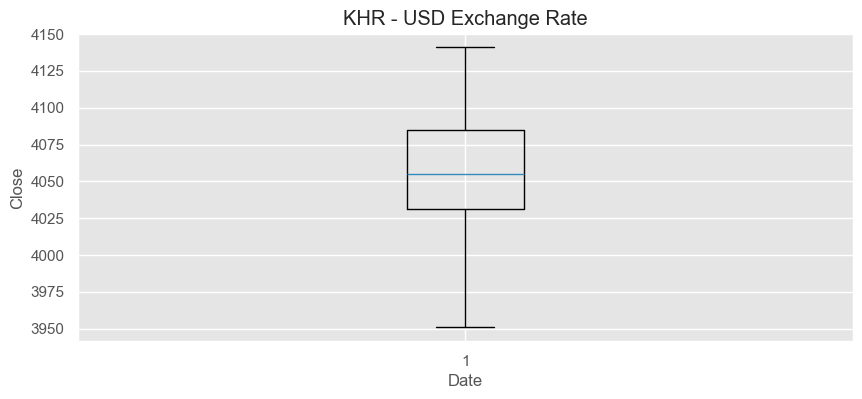

In [9]:
# plot boxplot again
plt.figure(figsize=(10, 4))
plt.title("KHR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.boxplot(data["Close"])
plt.show()

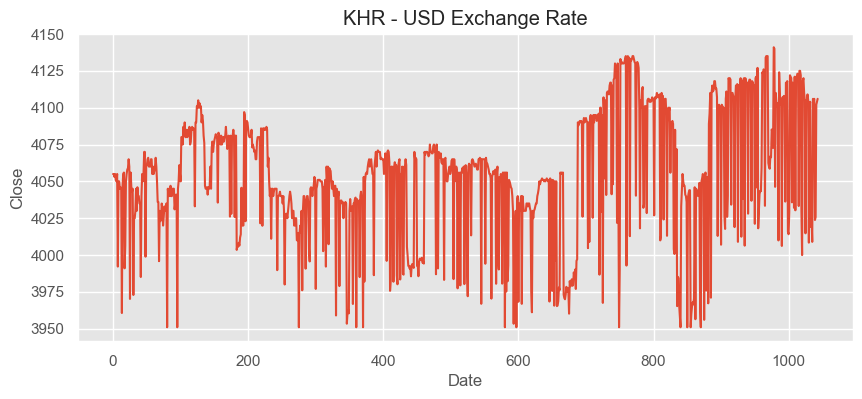

In [10]:
# plot line graph for ['Close']
plt.figure(figsize=(10, 4))
plt.title("KHR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

Now let’s have a look at the correlation between the features before training the currency exchange rate prediction model:

               Open      High       Low     Close  Adj Close
Open       1.000000  0.413368  0.849627  0.438409   0.438409
High       0.413368  1.000000  0.470004  0.509903   0.509903
Low        0.849627  0.470004  1.000000  0.518907   0.518907
Close      0.438409  0.509903  0.518907  1.000000   1.000000
Adj Close  0.438409  0.509903  0.518907  1.000000   1.000000


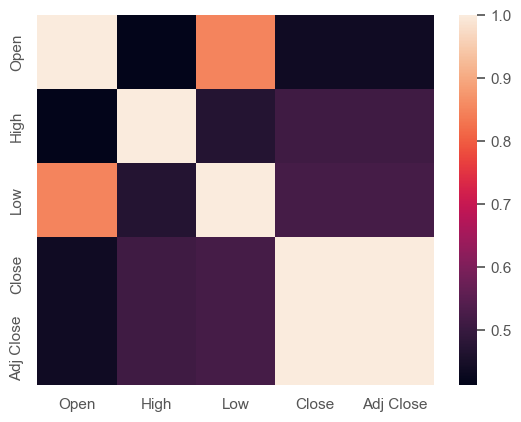

In [11]:
# Select all columns except the first one
data_for_corr = data.iloc[:, 1:]

# Calculate the correlation matrix
corr_matrix = data_for_corr.corr()
print(corr_matrix)

# Create a heatmap
sns.heatmap(corr_matrix)
plt.show()

Now the next step is to prepare the dataset by storing the most relevant features in the variable x and storing the target column in the variable y:

In [12]:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

Now let’s split the dataset and train a currency exchange prediction model using the Decision Tree Regression model using Python:

In [13]:
# Predict the rate for the next 7 days
from sklearn.model_selection import train_test_split

# Remove rows with missing values
data.dropna(inplace=True)


# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
# Train the model
model.fit(xtrain, ytrain)
# Make predictions
ypred = model.predict(xtest)

Now let’s have a look at the predicted values of currency exchange rates of KHR for the next 7 days:

In [14]:
data = pd.DataFrame(data={"Predicted Rate": ypred.flatten()})
print(data.head(7))

   Predicted Rate
0     4062.427734
1     4020.000000
2     4060.000000
3     4052.000000
4     4050.000000
5     4036.320068
6     4046.296631


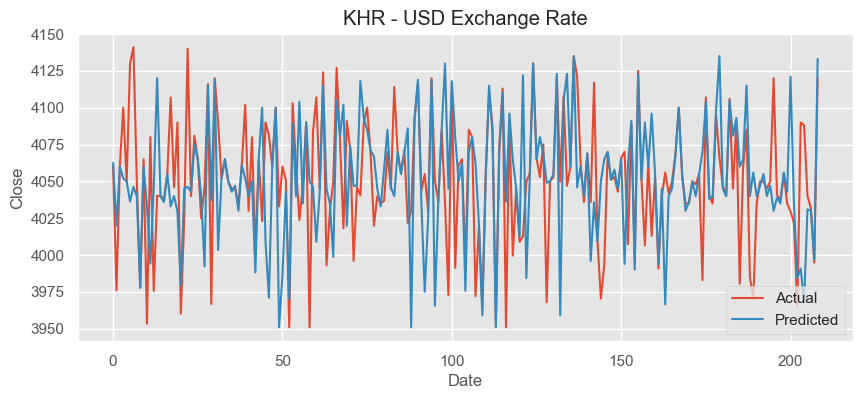

In [15]:
# Plot the results
plt.figure(figsize=(10, 4))
plt.title("KHR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(ytest, label="Actual")
plt.plot(ypred, label="Predicted")
plt.legend()
plt.show()

### Get the accuracy rate of our model

In [17]:
# Calculate the mean absolute error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(ytest, ypred)
print("MAE:", mae)

# Calculate the mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(ytest, ypred)
print("MSE:", mse)

# Calculate the root mean squared error
from math import sqrt

rmse = sqrt(mse)
print("RMSE:", rmse)

# Calculate the mean absolute percentage error
errors = abs(ypred - ytest)
mape = 100 * (errors / ytest)

MAE: 27.720093334928233
MSE: 2005.2037638129857
RMSE: 44.77950160299895
